In [1]:
from src.utilities import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

In [2]:
ratings_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Book-Ratings.csv')
books_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Books.csv')
users_df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Users.csv')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/

In [3]:
print('ratings_df: ', ratings_df.shape)
print('users_df: ', users_df.shape)
print('books_df: ', books_df.shape)

ratings_df:  (1149780, 3)
users_df:  (278858, 3)
books_df:  (271360, 8)


In [4]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [5]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books_df.drop(columns=columns, inplace=True)

In [8]:
books_df.rename(columns={'Year-Of-Publication':'Publication-Year'},inplace=True)
books_df.drop(columns='Publisher',inplace=True)

In [9]:
books_ratings_df = pd.merge(ratings_df, books_df, on='ISBN')

In [10]:
print(books_ratings_df.shape)
print('===========================================================')
books_ratings_df.head()

(1031136, 6)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publication-Year
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002


In [11]:
books_ratings_df = books_ratings_df[books_ratings_df['Publication-Year'] != 'Gallimard']
books_ratings_df = books_ratings_df[books_ratings_df['Publication-Year'] != 'DK Publishing Inc']

In [12]:
books_ratings_df['Publication-Year'] = books_ratings_df['Publication-Year'].apply(lambda x: int(x))

In [13]:
books_ratings_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publication-Year
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002


In [14]:
# Average ratings and number of ratings (or ratings count)
average_count_rating = pd.DataFrame(books_ratings_df.groupby('ISBN')['Book-Rating'].mean())

In [15]:
average_count_rating['Rating-Count'] = pd.DataFrame(books_ratings_df.groupby('ISBN')['Book-Rating'].count())

In [16]:
average_count_rating.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)

In [17]:
print(average_count_rating.shape)
print('')
print('============================')
print('average_count_rating :::::::')
print('============================')
average_count_rating.sort_values('Rating-Count', ascending=False).head()

(270148, 2)

average_count_rating :::::::


,Average-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



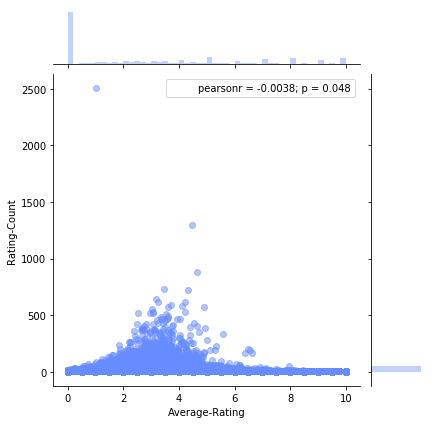

In [240]:
# Getting scatter plot between Average-Rating and Rating-Count
sns.jointplot(x = 'Average-Rating', y = 'Rating-Count', 
              alpha=0.5, 
              color='#668cff',
              data=average_count_rating);

## Recommendations Based on Most Rated Books

In [19]:
# Step 1: Sort by Rating-Count
test10=average_count_rating.sort_values(by='Rating-Count', ascending=False).head(10)
test10

,Average-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
044023722X,3.187017,647
0142001740,4.219512,615
067976402X,3.255700,614
0671027360,3.718430,586


In [20]:
top_isbn=test10.index.to_list()
top_isbn

['0971880107',
 '0316666343',
 '0385504209',
 '0060928336',
 '0312195516',
 '044023722X',
 '0142001740',
 '067976402X',
 '0671027360',
 '0446672211']

In [21]:
most_rated = pd.DataFrame(top_isbn, index=np.arange(len(top_isbn)), columns=['ISBN'])
most_rated_books = pd.merge(most_rated, books_ratings_df, on='ISBN')

In [22]:
top_book_titles = most_rated_books['Book-Title'].value_counts().to_frame()
top_book_titles.rename(columns={'Book-Title':'Count'},inplace=True)
top_book_titles

,Count
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,883
Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
The Red Tent (Bestselling Backlist),723
A Painted House,647
The Secret Life of Bees,615
Snow Falling on Cedars,614
Angels &amp; Demons,586
Where the Heart Is (Oprah's Book Club (Paperback)),585


In [305]:
pd.Series(top_book_titles.index)

0                                          Wild Animus
1                            The Lovely Bones: A Novel
2                                    The Da Vinci Code
3      Divine Secrets of the Ya-Ya Sisterhood: A Novel
4                  The Red Tent (Bestselling Backlist)
5                                      A Painted House
6                              The Secret Life of Bees
7                               Snow Falling on Cedars
8                                  Angels &amp; Demons
9    Where the Heart Is (Oprah's Book Club (Paperba...
dtype: object

## Recommendations Based on Correlation (Pearson R)

In [23]:
print(average_count_rating.shape)
print('')
average_count_rating.head()

(270148, 2)



,Average-Rating,Rating-Count
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


In [24]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [25]:
counts1 = ratings_df['User-ID'].value_counts()
counts2 = ratings_df['Book-Rating'].value_counts()

In [26]:
# Filtering out ratings_df by publication year is not advisable
ratings = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 200].index)] 
print(ratings.shape)
print('')
ratings.head()

(527556, 3)



,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [27]:
ratings = ratings[ratings['Book-Rating'].isin(counts2[counts2 >= 100].index)]
print(ratings.shape)
print('')
ratings.head()

(527556, 3)



,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [28]:
book_matrix = pd.pivot_table(ratings, index='User-ID', columns='ISBN', values='Book-Rating')
print(book_matrix.shape)
print('')
book_matrix.head()

(905, 207699)



ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sample(10)

,User-ID,ISBN,Book-Rating
92808,20859,3442246032,0
526580,127233,0679751114,0
27801,6543,1550223968,0
714950,173291,0671039199,0
766982,185233,0892813458,0
956273,231210,0399140832,0
1086830,260183,0962368326,0
1095992,262998,1853260134,8
845996,204864,031226805X,0
875149,211919,0553271644,0


In [30]:
user_rating = book_matrix['0316666343']
print(user_rating.shape)
print('')
user_rating.head()

(905,)



User-ID
254     NaN
2276    NaN
2766    9.0
2977    NaN
3363    0.0
Name: 0316666343, dtype: float64

In [31]:
similar_to_user_rating = book_matrix.corrwith(user_rating)
similar_to_user_rating.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


ISBN
 0330299891   NaN
 0375404120   NaN
 0586045007   NaN
 9022906116   NaN
 9032803328   NaN
dtype: float64

In [32]:
correlated_books = pd.DataFrame(similar_to_user_rating, columns=['pearsonR'])
correlated_books.head()

,pearsonR
ISBN,
0330299891,NaN
0375404120,NaN
0586045007,NaN
9022906116,NaN
9032803328,NaN


In [33]:
correlated_books.dropna(inplace=True)

In [34]:
correlated_books.head()

,pearsonR
ISBN,
0002005018,9.614813e-18
0002184974,1.000000e+00
0002250810,1.000000e+00
000225929X,1.000000e+00
0006127754,-1.000000e+00


In [35]:
average_count_rating.head()

,Average-Rating,Rating-Count
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


In [36]:
correlation_summary = correlated_books.join(average_count_rating['Rating-Count'])

In [37]:
correlation_summary.head()

,pearsonR,Rating-Count
ISBN,,
0002005018,9.614813e-18,14.0
0002184974,1.000000e+00,2.0
0002250810,1.000000e+00,3.0
000225929X,1.000000e+00,4.0
0006127754,-1.000000e+00,NaN


In [38]:
correlation_summary[correlation_summary['Rating-Count'] >= 300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,Rating-Count
ISBN,,
0316666343,1.000000,1295.0
0312291639,0.471872,354.0
0316601950,0.434248,568.0
0446610038,0.429712,391.0
0446672211,0.421478,585.0
0385265700,0.351635,319.0
0345342968,0.316922,321.0
0060930535,0.309860,494.0
0375707972,0.308145,354.0


In [39]:
isbn_only = correlation_summary[correlation_summary['Rating-Count'] >= 300].sort_values('pearsonR', ascending=False).head(11)

In [40]:
isbn_list=isbn_only.index.tolist()[1:]

In [41]:
books_isbn = pd.DataFrame(isbn_list, index=np.arange(len(isbn_list)), columns=['ISBN'])
books_isbn

,ISBN
0,0312291639
1,0316601950
2,0446610038
3,0446672211
4,0385265700
5,0345342968
6,0060930535
7,0375707972
8,0684872153
9,0671021001


In [42]:
correlated_book_titles=pd.merge(books_isbn, books_df, on='ISBN')

In [43]:
correlated_book_titles

,ISBN,Book-Title,Book-Author,Publication-Year
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999
2,0446610038,1st to Die: A Novel,James Patterson,2002
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999
7,0375707972,The Reader,Bernhard Schlink,1999
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999
9,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998


## Matrix Factorization

In [50]:
!pip install scikit-surprise

  Using cached https://files.pythonhosted.org/packages/f5/da/b5700d96495fb4f092be497f02492768a3d96a3f4fa2ae7dea46d4081cfa/scikit-surprise-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Running setup.py bdist_wheel for scikit-surprise ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [55]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [83]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1 MB 49.7 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 4.3.0
    Uninstalling plotly-4.3.0:
      Successfully uninstalled plotly-4.3.0


# Surprise Package

In [198]:
import surprise
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import BaselineOnly, SVD, NMF, KNNBasic, KNNBaseline, KNNWithMeans, NormalPredictor
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from collections import defaultdict

### Merging users_df and ratings_df: Trimming Down

In [76]:
df = pd.merge(users_df, ratings_df, on='User-ID', how='inner')

In [77]:
print(df.shape)
print('')
df.head()

(1149780, 5)



,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [79]:
columns=['Location', 'Age']
df.drop(columns=columns,inplace=True)
df.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [81]:
print(df.shape)
print('')
df.iloc[::200000,:]

(1149780, 3)



,User-ID,ISBN,Book-Rating
0,2,0195153448,0
200000,48494,0871233428,0
400000,98391,0670032549,10
600000,147513,0470832525,5
800000,196502,0590431862,0
1000000,242157,0732275865,0


In [111]:
df.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


## Trimming down dataset

In [110]:
min_book_ratings = 50 # Books: At least 50 ratings received
min_user_ratings = 50 # Users: At least 50 ratings given

In [121]:
filter_books = df['ISBN'].value_counts() > min_book_ratings

In [123]:
filter_books.shape

(340556,)

In [124]:
filter_books = filter_books[filter_books].index.tolist()

In [125]:
len(filter_books)

2125

In [127]:
filter_users = df['User-ID'].value_counts() > min_user_ratings

In [128]:
filter_users.shape

(105283,)

In [129]:
filter_users = filter_users[filter_users].index.tolist()

In [130]:
len(filter_users)

3371

In [131]:
filtered_df = df[(df['ISBN'].isin(filter_books)) & (df['User-ID'].isin(filter_users))]

In [132]:
filtered_df.shape

(140516, 3)

In [170]:
print(type(filtered_df['Book-Rating'].iloc[20]))

filtered_df.head()

<class 'numpy.int64'>


,User-ID,ISBN,Book-Rating
394,243,0060915544,10
395,243,0060977493,7
397,243,0156006529,0
400,243,0316096199,0
401,243,0316601950,9


In [157]:
df.shape

(1149780, 3)

## Begin Model

In [145]:
reader = Reader(rating_scale=(0,10))
data = Dataset.load_from_df(filtered_df, reader)

In [182]:
# NMF()
algorithm = [BaselineOnly(), SVD(), KNNBasic(), KNNBaseline(), KNNWithMeans(), NormalPredictor()]

In [183]:
# Test algorithm
algo = SVD()
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

{'test_rmse': array([3.54944586, 3.55710487, 3.56877917, 3.53851973, 3.56844861]),
 'fit_time': (4.575680494308472,
  4.623382091522217,
  4.631357669830322,
  4.634942293167114,
  4.635144948959351),
 'test_time': (0.14231634140014648,
  0.1424417495727539,
  0.14326977729797363,
  0.14379477500915527,
  0.2977566719055176)}

In [184]:
comparison_list = []

for algo in algorithm:
    # Perform cross validation
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Append to comparison list
    get_result = pd.DataFrame.from_dict(results).mean(axis=0)
    get_result = get_result.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    comparison_list.append(get_result)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

32512

In [185]:
comparison_list

[test_rmse         3.36399
 fit_time          0.18912
 test_time        0.138075
 Algorithm    BaselineOnly
 dtype: object, test_rmse     3.55793
 fit_time      4.57676
 test_time    0.209597
 Algorithm         SVD
 dtype: object, test_rmse     3.68121
 fit_time     0.692295
 test_time     2.25387
 Algorithm    KNNBasic
 dtype: object, test_rmse        3.45925
 fit_time        0.853066
 test_time        2.79533
 Algorithm    KNNBaseline
 dtype: object, test_rmse         3.46041
 fit_time          0.73655
 test_time         2.41876
 Algorithm    KNNWithMeans
 dtype: object, test_rmse            4.71297
 fit_time            0.124203
 test_time           0.213137
 Algorithm    NormalPredictor
 dtype: object]

In [186]:
surprise_results = pd.DataFrame(comparison_list).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,3.363986,0.189120,0.138075
KNNBaseline,3.459248,0.853066,2.795334
KNNWithMeans,3.460412,0.736550,2.418761
SVD,3.557929,4.576756,0.209597
KNNBasic,3.681208,0.692295,2.253865
NormalPredictor,4.712974,0.124203,0.213137


In [189]:
print('Using ALS : Alternating Least Squares')
baseline_only = {'method':'als', 'n_epochs':5, 'regu_u': 12, 'reg_i':5}
algo = BaselineOnly(bsl_options=baseline_only)
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

Using ALS : Alternating Least Squares
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([3.38989491, 3.36151093, 3.37360512, 3.35483598, 3.36052898]),
 'fit_time': (0.10425209999084473,
  0.1351330280303955,
  0.13582515716552734,
  0.13403940200805664,
  0.13751912117004395),
 'test_time': (0.10500693321228027,
  0.35311174392700195,
  0.10441899299621582,
  0.10539078712463379,
  0.32987523078918457)}

In [245]:
trainset, testset = train_test_split(data, test_size=0.20)
algo = BaselineOnly(bsl_options=baseline_only)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 3.3659


3.3659468639635266

In [246]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

In [249]:
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [250]:
df_pred.head()

,uid,iid,rui,est,details
0,104113,0060987103,8.0,3.890729,{'was_impossible': False}
1,105517,0440108268,3.0,2.581818,{'was_impossible': False}
2,232131,044023722X,0.0,1.079756,{'was_impossible': False}
3,196985,0679781587,0.0,1.962622,{'was_impossible': False}
4,143175,0671036505,0.0,3.153911,{'was_impossible': False}


In [261]:
df_pred['Iu']=df_pred['uid'].apply(get_Iu)
df_pred['Ui']=df_pred['iid'].apply(get_Ui)
df_pred['err']=abs(df_pred.est - df_pred.rui)

In [263]:
print(df_pred.shape)
print('')
df_pred.head()

(28104, 8)



,uid,iid,rui,est,details,Iu,Ui,err
0,104113,0060987103,8.0,3.890729,{'was_impossible': False},35,143,4.109271
1,105517,0440108268,3.0,2.581818,{'was_impossible': False},88,44,0.418182
2,232131,044023722X,0.0,1.079756,{'was_impossible': False},380,238,1.079756
3,196985,0679781587,0.0,1.962622,{'was_impossible': False},32,249,1.962622
4,143175,0671036505,0.0,3.153911,{'was_impossible': False},88,36,3.153911


In [269]:
best_predictions = df_pred.sort_values(by='err')[:20]
worst_predictions = df_pred.sort_values(by='err')[-20:]

In [283]:
df_full_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details',])
df_full_pred['Iu']=df_full_pred['uid'].apply(get_Iu)
df_full_pred['Ui']=df_full_pred['iid'].apply(get_Ui)
df_full_pred['err']=abs(df_full_pred.est - df_full_pred.rui)

In [285]:
print(df_full_pred.shape)
print('')
df_full_pred.head()

(28104, 8)



,uid,iid,rui,est,details,Iu,Ui,err
0,104113,0060987103,8.0,3.890729,{'was_impossible': False},35,143,4.109271
1,105517,0440108268,3.0,2.581818,{'was_impossible': False},88,44,0.418182
2,232131,044023722X,0.0,1.079756,{'was_impossible': False},380,238,1.079756
3,196985,0679781587,0.0,1.962622,{'was_impossible': False},32,249,1.962622
4,143175,0671036505,0.0,3.153911,{'was_impossible': False},88,36,3.153911


In [287]:
df_full_pred.rename(columns={'iid':'ISBN'},inplace=True)
full_pred = pd.merge(df_full_pred, books_df, on='ISBN')

In [290]:
full_pred.sort_values(by='err', ascending=True, inplace=True)

In [292]:
print(full_pred.shape)
print('')
full_pred.head()

(27873, 11)



,uid,ISBN,rui,est,details,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
906,238120,0971880107,0.0,0.0,{'was_impossible': False},352,665,0.0,Wild Animus,Rich Shapero,2004
18977,175003,0743422910,0.0,0.0,{'was_impossible': False},296,27,0.0,The Constant Gardener,John le Carre,2001
26505,246655,1551668300,0.0,0.0,{'was_impossible': False},108,35,0.0,16 Lighthouse Road,Debbie Macomber,2001
8741,166123,0671023187,0.0,0.0,{'was_impossible': False},200,23,0.0,Term Limits,Vince Flynn,1999
8738,123790,0671023187,0.0,0.0,{'was_impossible': False},93,23,0.0,Term Limits,Vince Flynn,1999


In [304]:
full_pred[full_pred['err'] == 0].sort_values(by='Ui', ascending=False).head(60)

,uid,ISBN,rui,est,details,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
906,238120,0971880107,0.0,0.0,{'was_impossible': False},352,665,0.0,Wild Animus,Rich Shapero,2004
877,231210,0971880107,0.0,0.0,{'was_impossible': False},227,665,0.0,Wild Animus,Rich Shapero,2004
870,185233,0971880107,0.0,0.0,{'was_impossible': False},360,665,0.0,Wild Animus,Rich Shapero,2004
911,204359,0971880107,0.0,0.0,{'was_impossible': False},31,665,0.0,Wild Animus,Rich Shapero,2004
910,95923,0971880107,0.0,0.0,{'was_impossible': False},24,665,0.0,Wild Animus,Rich Shapero,2004
909,55492,0971880107,0.0,0.0,{'was_impossible': False},402,665,0.0,Wild Animus,Rich Shapero,2004
908,64946,0971880107,0.0,0.0,{'was_impossible': False},13,665,0.0,Wild Animus,Rich Shapero,2004
907,277478,0971880107,0.0,0.0,{'was_impossible': False},23,665,0.0,Wild Animus,Rich Shapero,2004
898,123790,0971880107,0.0,0.0,{'was_impossible': False},93,665,0.0,Wild Animus,Rich Shapero,2004
969,207721,0971880107,0.0,0.0,{'was_impossible': False},56,665,0.0,Wild Animus,Rich Shapero,2004


In [274]:
best_predictions.rename(columns={'iid':'ISBN'}, inplace=True)

In [275]:
worst_predictions.rename(columns={'iid':'ISBN'},inplace=True)

In [276]:
best_pred = pd.merge(best_predictions, books_df, on='ISBN')

In [280]:
best_pred.drop(columns=['details'],inplace=True)
best_pred

,uid,ISBN,rui,est,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
0,217375,0451408888,0.0,0.0,261,32,0.0,The Trials of Tiffany Trott,Isabel Wolff,1999
1,73394,0679439382,0.0,0.0,252,55,0.0,The Little Friend,Donna Tartt,2002
2,175003,0380804697,0.0,0.0,296,21,0.0,Paradise Lost,J.A. Jance,2002
3,269719,002026478X,0.0,0.0,107,41,0.0,AGE OF INNOCENCE (MOVIE TIE-IN),Edith Wharton,1993
4,49109,0440217490,0.0,0.0,96,46,0.0,A Dangerous Fortune,Ken Follett,1994
5,102967,0671567829,0.0,0.0,408,32,0.0,The Bookman's Wake (Cliff Janeway Novels (Pape...,John Dunning,1996
6,76352,0446802204,0.0,0.0,515,36,0.0,Master of the Game,Sidney Sheldon,1983
7,51094,0451200101,0.0,0.0,65,19,0.0,The Experiment,John Darnton,2000
8,55492,044023574X,0.0,0.0,402,33,0.0,After the Fire,Belva Plain,2001
9,175003,0671024248,0.0,0.0,296,75,0.0,Hearts In Atlantis,Stephen King,2000


In [278]:
worst_pred = pd.merge(worst_predictions, books_df, on='ISBN')

In [281]:
worst_pred.drop('details',1,inplace=True)
worst_pred

,uid,ISBN,rui,est,Iu,Ui,err,Book-Title,Book-Author,Publication-Year
0,161752,0345348109,10.0,0.714734,69,49,9.285266,The Killer Angels,Michael Shaara,1993
1,136205,0425152898,10.0,0.643882,101,47,9.356118,Mind Prey,John Sandford,2004
2,256407,0345388771,10.0,0.643261,148,34,9.356739,Primal Fear,William Diehl,1996
3,217375,0446530522,10.0,0.640470,261,39,9.359530,Cane River,Lalita Tademy,2001
4,51450,0515116068,10.0,0.629383,82,25,9.370617,Hidden Riches,Nora Roberts,2004
5,200674,0553576801,10.0,0.624082,153,55,9.375918,The Perfect Husband,LISA GARDNER,1997
6,40943,0380710722,10.0,0.604509,142,59,9.395491,It's Always Something,Gilda Radner,1990
7,35857,0380710722,10.0,0.405161,189,59,9.594839,It's Always Something,Gilda Radner,1990
8,77940,0671027581,10.0,0.552321,65,47,9.447679,Open Season,Linda Howard,2002
9,219546,0156007479,10.0,0.546671,138,44,9.453329,Slammerkin,Emma Donoghue,2002
